In [1]:
from pykrx import stock
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
InverseX2 = stock.get_market_ohlcv_by_date("20000101", "20250101", "500072")
X2 = stock.get_market_ohlcv_by_date("20000101", "20250101", "233740")

In [3]:
dfCloseInverseX2 = InverseX2[['종가']]
dfCloseX2 = X2[['종가']]

In [4]:
# dfCloseInverseX2.describe()

In [5]:
dfCloseInverseX2['변화량'] = dfCloseInverseX2['종가'] - dfCloseInverseX2['종가'].shift(1)
dfCloseX2['변화량'] = dfCloseX2['종가'] - dfCloseX2['종가'].shift(1)
dfCloseX2


/tmp/ipykernel_69311/129258601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCloseInverseX2['변화량'] = dfCloseInverseX2['종가'] - dfCloseInverseX2['종가'].shift(1)
/tmp/ipykernel_69311/129258601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCloseX2['변화량'] = dfCloseX2['종가'] - dfCloseX2['종가'].shift(1)


,종가,변화량
날짜,,
2015-12-17,10330,NaN
2015-12-18,10710,380.0
2015-12-21,10720,10.0
2015-12-22,10495,-225.0
2015-12-23,10425,-70.0
...,...,...
2024-12-23,6535,190.0
2024-12-24,6610,75.0
2024-12-26,6565,-45.0


In [6]:
condUpInverseX2 = dfCloseInverseX2['변화량'] >= 0
condDownInverseX2 = dfCloseInverseX2['변화량'] < 0
condUpX2 = dfCloseX2['변화량'] >= 0
condDownX2 = dfCloseX2['변화량'] < 0

In [7]:
# =을 기준으로 앞과 뒤가 달라지면 달라짐.. 결국 = 앞에 있는게 새로운 칼럼을 만들어진다고


dfCloseInverseX2.loc[condUpInverseX2, '상승폭'] = dfCloseInverseX2['변화량'] 
dfCloseInverseX2.loc[condDownInverseX2, '하락폭'] = -dfCloseInverseX2['변화량']
dfCloseX2.loc[condUpX2, '상승폭'] = dfCloseX2['변화량']
dfCloseX2.loc[condDownX2, '하락폭'] = -dfCloseX2['변화량']
dfCloseInverseX2
# dfCloseX2

/tmp/ipykernel_69311/3156470303.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCloseInverseX2.loc[condUpInverseX2, '상승폭'] = dfCloseInverseX2['변화량']
/tmp/ipykernel_69311/3156470303.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCloseInverseX2.loc[condDownInverseX2, '하락폭'] = -dfCloseInverseX2['변화량']
/tmp/ipykernel_69311/3156470303.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,종가,변화량,상승폭,하락폭
날짜,,,,
2022-10-17,20065,NaN,NaN,NaN
2022-10-18,18915,-1150.0,NaN,1150.0
2022-10-19,19465,550.0,550.0,NaN
2022-10-20,20450,985.0,985.0,NaN
2022-10-21,20510,60.0,60.0,NaN
...,...,...,...,...
2024-12-23,8015,-235.0,NaN,235.0
2024-12-24,7910,-105.0,NaN,105.0
2024-12-26,7950,40.0,40.0,NaN


In [8]:
dfCloseInverseX2 = dfCloseInverseX2.fillna(0)
dfCloseX2 = dfCloseX2.fillna(0)


In [9]:
# dfCloseX2

In [10]:
# rolling은 rows를 window만큼 묶어서 내리고 계산

dfCloseInverseX2['AU'] = dfCloseInverseX2['상승폭'].rolling(window=3).mean()
dfCloseInverseX2['DU'] = dfCloseInverseX2['하락폭'].rolling(window=3).mean() 
dfCloseInverseX2

,종가,변화량,상승폭,하락폭,AU,DU
날짜,,,,,,
2022-10-17,20065,0.0,0.0,0.0,NaN,NaN
2022-10-18,18915,-1150.0,0.0,1150.0,NaN,NaN
2022-10-19,19465,550.0,550.0,0.0,183.333333,383.333333
2022-10-20,20450,985.0,985.0,0.0,511.666667,383.333333
2022-10-21,20510,60.0,60.0,0.0,531.666667,0.000000
...,...,...,...,...,...,...
2024-12-23,8015,-235.0,0.0,235.0,255.000000,78.333333
2024-12-24,7910,-105.0,0.0,105.0,125.000000,113.333333
2024-12-26,7950,40.0,40.0,0.0,13.333333,113.333333


In [11]:
dfCloseX2['AU'] = dfCloseX2['상승폭'].rolling(window=3).mean()
dfCloseX2['DU'] = dfCloseX2['하락폭'].rolling(window=3).mean()
dfCloseX2

,종가,변화량,상승폭,하락폭,AU,DU
날짜,,,,,,
2015-12-17,10330,0.0,0.0,0.0,NaN,NaN
2015-12-18,10710,380.0,380.0,0.0,NaN,NaN
2015-12-21,10720,10.0,10.0,0.0,130.000000,0.000000
2015-12-22,10495,-225.0,0.0,225.0,130.000000,75.000000
2015-12-23,10425,-70.0,0.0,70.0,3.333333,98.333333
...,...,...,...,...,...,...
2024-12-23,6535,190.0,190.0,0.0,63.333333,223.333333
2024-12-24,6610,75.0,75.0,0.0,88.333333,101.666667
2024-12-26,6565,-45.0,0.0,45.0,88.333333,15.000000


In [12]:
dfCloseInverseX2['RSI'] = (dfCloseInverseX2['AU'] / (dfCloseInverseX2['AU'] + dfCloseInverseX2['DU'])) * 100
dfCloseX2['RSI'] = (dfCloseX2['AU'] / (dfCloseX2['AU'] + dfCloseX2['DU'])) * 100


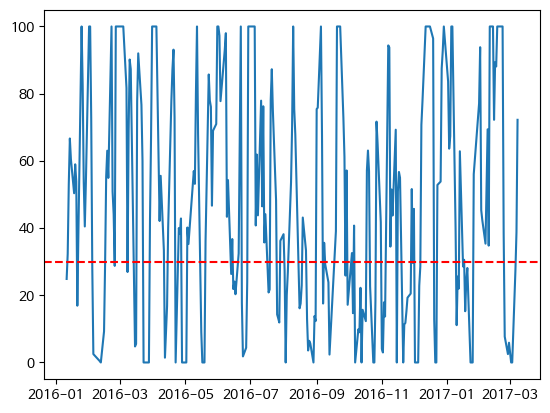

In [13]:
import matplotlib.pyplot as plt
plt.figure((14.9))
plt.plot(dfCloseX2['RSI'][14:300])
plt.axhline(y=30, color='r', linestyle='--')
plt.show()

In [14]:
# # RSI 계산
# def calculate_rsi(df):
#     df['RSI'] = df['AU'] / (df['AU'] + df['DU']) * 100
#     return df

# # RSI 계산 적용
# dfCloseInverseX2 = calculate_rsi(dfCloseInverseX2)
# dfCloseX2 = calculate_rsi(dfCloseX2)

# # 매매 신호 생성
# def generate_signals(df):
#     df['Signal'] = 0  # 0: 중립, 1: 매수, -1: 매도
    
#     # RSI < 30: 매수
#     df.loc[df['RSI'] < 30, 'Signal'] = 1
    
#     # RSI > 70: 매도
#     df.loc[df['RSI'] > 70, 'Signal'] = -1
    
#     return df

# # 매매 신호 적용
# dfCloseInverseX2 = generate_signals(dfCloseInverseX2)
# dfCloseX2 = generate_signals(dfCloseX2)

# # 백테스팅 함수
# def backtest(df):
#     position = 0  # 현재 포지션 (0: 없음, 1: 보유)
#     trades = []  # 거래 기록
#     entry_price = 0  # 매수 가격
    
#     for index, row in df.iterrows():
#         if position == 0:  # 포지션이 없을 때
#             if row['Signal'] == 1:  # 매수 신호
#                 position = 1
#                 entry_price = row['종가']
#                 trades.append({
#                     'date': index,
#                     'type': 'buy',
#                     'price': row['종가'],
#                     'rsi': row['RSI']
#                 })
        
#         elif position == 1:  # 포지션 보유 중
#             if row['Signal'] == -1:  # 매도 신호
#                 position = 0
#                 profit = row['종가'] - entry_price
#                 trades.append({
#                     'date': index,
#                     'type': 'sell',
#                     'price': row['종가'],
#                     'profit': profit,
#                     'rsi': row['RSI']
#                 })
    
#     return trades

# # 백테스팅 실행
# inverse_x2_trades = backtest(dfCloseInverseX2)
# x2_trades = backtest(dfCloseX2)

# # 결과 출력
# def print_trading_results(trades, name):
#     total_trades = len([t for t in trades if t['type'] == 'buy'])
#     profitable_trades = len([t for t in trades if t['type'] == 'sell' and t['profit'] > 0])
#     total_profit = sum([t['profit'] for t in trades if t['type'] == 'sell'])
    
#     print(f"\n{name} 거래 결과:")
#     print(f"총 거래 횟수: {total_trades}")
#     print(f"수익 거래: {profitable_trades}")
#     print(f"총 수익: {total_profit:,.0f}원")
    
#     # 최근 5개 거래 내역 출력
#     print("\n최근 5개 거래:")
#     for trade in trades[-10:]:
#         if trade['type'] == 'buy':
#             print(f"매수: {trade['date'].strftime('%Y-%m-%d')} | 가격: {trade['price']:,.0f} | RSI: {trade['rsi']:.2f}")
#         else:
#             print(f"매도: {trade['date'].strftime('%Y-%m-%d')} | 가격: {trade['price']:,.0f} | 수익: {trade['profit']:,.0f} | RSI: {trade['rsi']:.2f}")

# print_trading_results(inverse_x2_trades, "Inverse X2")
# print_trading_results(x2_trades, "X2")

# # 시각화
# def plot_trades(df, trades, title):
#     plt.figure(figsize=(15, 10))
    
#     # 가격 차트
#     plt.subplot(2, 1, 1)
#     plt.plot(df.index, df['종가'], label='Price', alpha=0.5)
    
#     # 매수/매도 포인트 표시
#     buy_points = [(t['date'], t['price']) for t in trades if t['type'] == 'buy']
#     sell_points = [(t['date'], t['price']) for t in trades if t['type'] == 'sell']
    
#     if buy_points:
#         buy_dates, buy_prices = zip(*buy_points)
#         plt.scatter(buy_dates, buy_prices, color='g', marker='^', label='Buy')
    
#     if sell_points:
#         sell_dates, sell_prices = zip(*sell_points)
#         plt.scatter(sell_dates, sell_prices, color='r', marker='v', label='Sell')
    
#     plt.title(f'{title} Price and Trades')
#     plt.legend()
    
#     # RSI 차트
#     plt.subplot(2, 1, 2)
#     plt.plot(df.index, df['RSI'], label='RSI', color='purple')
#     plt.axhline(y=70, color='r', linestyle='--')
#     plt.axhline(y=30, color='g', linestyle='--')
#     plt.title('RSI')
#     plt.legend()


    
#     plt.tight_layout()
#     plt.show()

# # 차트 그리기
# plot_trades(dfCloseInverseX2, inverse_x2_trades, 'Inverse X2')
# plot_trades(dfCloseX2, x2_trades, 'X2')


Inverse X2 거래 결과:
총 거래 횟수: 42
수익 거래: 20
승률: 47.6%
초기 자산: 100,000,000원
최종 자산: 41,228,459원
총 수익률: -58.77%
연평균 수익률(CAGR): -33.35%
투자 기간: 2.2년

최근 5개 거래:
매수: 2024-10-07 | 가격: 5,975 | RSI: 0.00
매도: 2024-10-11 | 가격: 6,165 | 수익: 190 | RSI: 91.30
매수: 2024-10-29 | 가격: 6,430 | RSI: 21.67
매도: 2024-11-01 | 가격: 6,790 | 수익: 360 | RSI: 82.14
매수: 2024-11-04 | 가격: 6,075 | RSI: 26.91
매도: 2024-11-07 | 가격: 6,640 | 수익: 565 | RSI: 100.00
매수: 2024-12-12 | 가격: 7,520 | RSI: 0.00
매도: 2024-12-19 | 가격: 7,875 | 수익: 355 | RSI: 86.61
매수: 2024-12-26 | 가격: 7,950 | RSI: 10.53
매도: 2024-12-30 | 가격: 7,805 | 수익: -145 | RSI: 40.37

X2 거래 결과:
총 거래 횟수: 178
수익 거래: 110
승률: 61.8%
초기 자산: 100,000,000원
최종 자산: 27,935,579원
총 수익률: -72.06%
연평균 수익률(CAGR): -13.17%
투자 기간: 9.0년

최근 5개 거래:
매수: 2024-10-11 | 가격: 9,255 | RSI: 0.00
매도: 2024-10-29 | 가격: 8,765 | 수익: -490 | RSI: 78.57
매수: 2024-11-01 | 가격: 8,285 | RSI: 19.62
매도: 2024-11-04 | 가격: 9,135 | 수익: 850 | RSI: 71.28
매수: 2024-11-07 | 가격: 8,360 | RSI: 0.00
매도: 2024-12-12 | 가격: 6,995 | 수익: -1

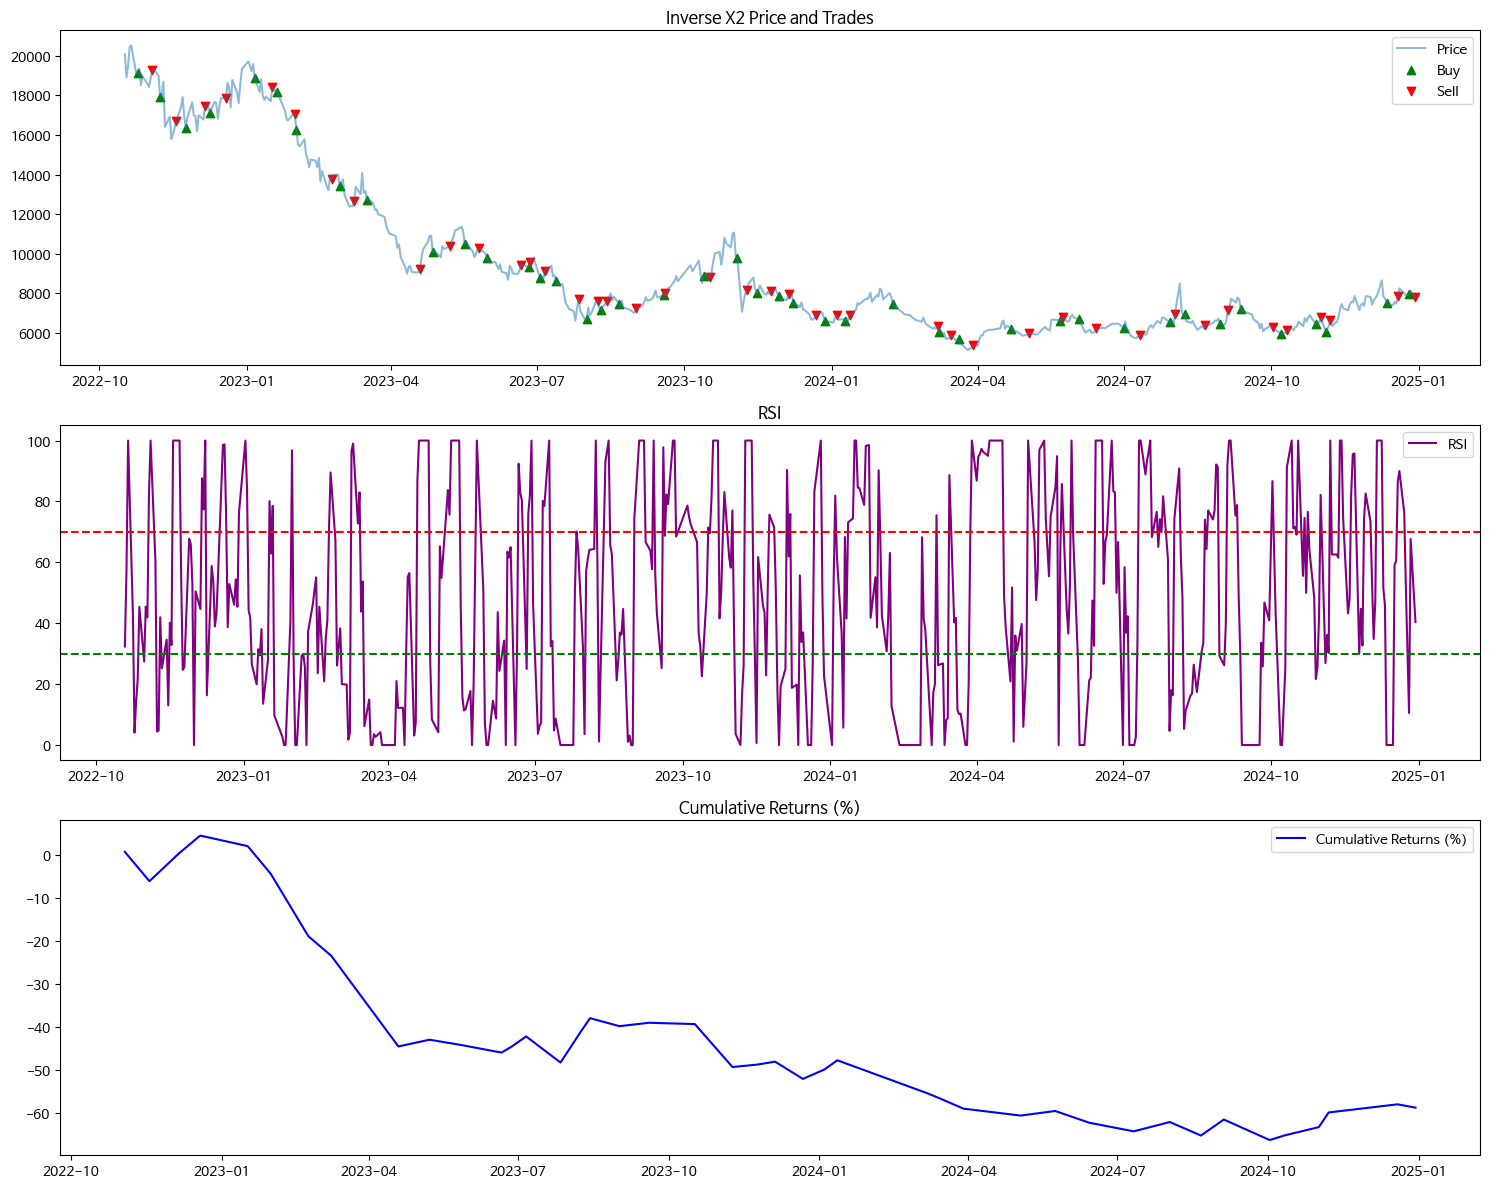

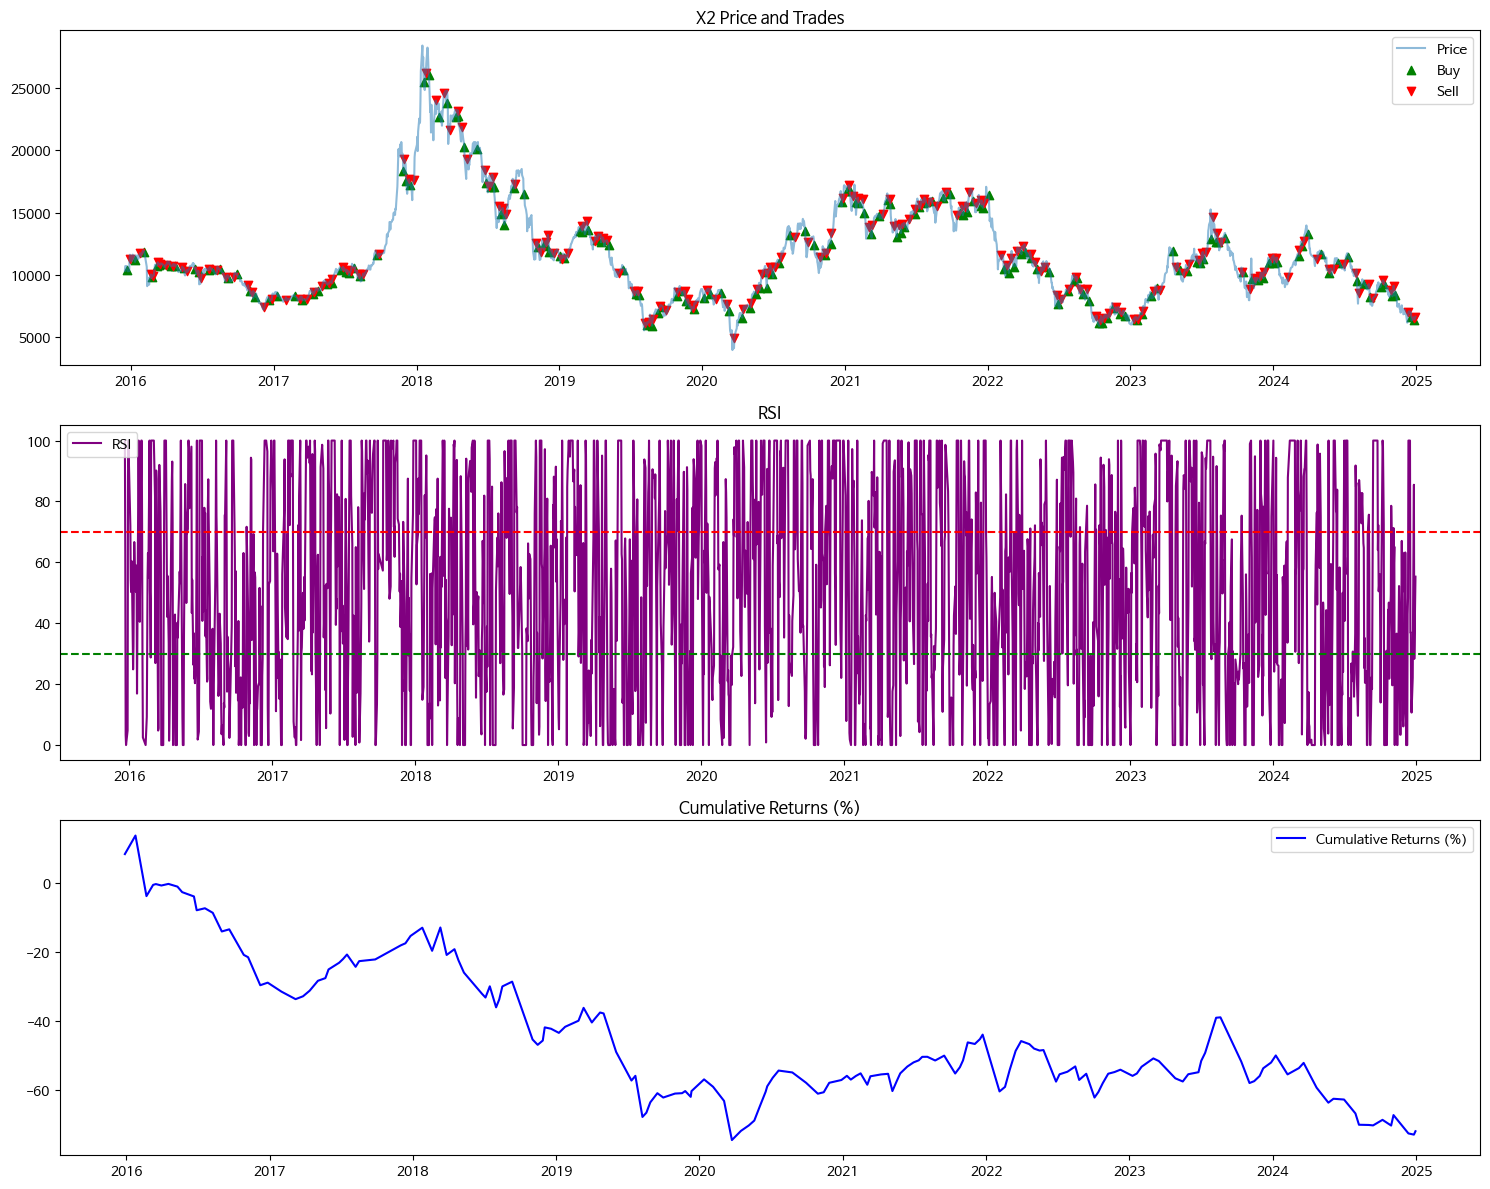

In [15]:
# RSI 계산
def calculate_rsi(df):
    df['RSI'] = df['AU'] / (df['AU'] + df['DU']) * 100
    return df

# 매매 신호 생성
def generate_signals(df):
    df['Signal'] = 0  # 0: 중립, 1: 매수, -1: 매도
    
    # RSI < 30: 매수
    df.loc[df['RSI'] < 30, 'Signal'] = 1
    
    # RSI > 70: 매도
    df.loc[df['RSI'] > 70, 'Signal'] = -1
    
    return df

# RSI 계산 적용
dfCloseInverseX2 = calculate_rsi(dfCloseInverseX2)
dfCloseX2 = calculate_rsi(dfCloseX2)

# 매매 신호 적용 - 이 부분이 먼저 실행되어야 함
dfCloseInverseX2 = generate_signals(dfCloseInverseX2)
dfCloseX2 = generate_signals(dfCloseX2)

def backtest(df):
    position = 0  # 현재 포지션 (0: 없음, 1: 보유)
    trades = []  # 거래 기록
    entry_price = 0  # 매수 가격
    current_value = 100000000  # 초기 투자금 1억원
    highest_value = current_value  # 최고 자산가치
    
    for index, row in df.iterrows():
        if position == 0:  # 포지션이 없을 때
            if row['Signal'] == 1:  # 매수 신호
                position = 1
                entry_price = row['종가']
                shares = current_value / entry_price  # 매수 가능 주식 수
                trades.append({
                    'date': index,
                    'type': 'buy',
                    'price': row['종가'],
                    'rsi': row['RSI'],
                    'value': current_value
                })
        
        elif position == 1:  # 포지션 보유 중
            if row['Signal'] == -1:  # 매도 신호
                position = 0
                exit_price = row['종가']
                current_value = shares * exit_price
                highest_value = max(highest_value, current_value)
                
                trades.append({
                    'date': index,
                    'type': 'sell',
                    'price': row['종가'],
                    'profit': exit_price - entry_price,
                    'rsi': row['RSI'],
                    'value': current_value
                })
    
    # 마지막 거래가 매수인 경우 강제 청산
    if position == 1:
        final_price = df['종가'].iloc[-1]
        current_value = shares * final_price
        trades.append({
            'date': df.index[-1],
            'type': 'sell',
            'price': final_price,
            'profit': final_price - entry_price,
            'rsi': df['RSI'].iloc[-1],
            'value': current_value
        })
    
    return trades, current_value
def calculate_cagr(initial_value, final_value, years):
    """
    CAGR(연평균 성장률) 계산
    """
    if initial_value > 0 and final_value > 0 and years > 0:
        cagr = (pow(final_value / initial_value, 1/years) - 1) * 100
        return cagr
    return 0

def print_trading_results(trades, name, initial_value=100000000):
    total_trades = len([t for t in trades if t['type'] == 'buy'])
    profitable_trades = len([t for t in trades if t['type'] == 'sell' and t['profit'] > 0])
    total_profit = sum([t['profit'] for t in trades if t['type'] == 'sell'])
    
    # 첫 거래와 마지막 거래 날짜
    first_trade_date = trades[0]['date']
    last_trade_date = trades[-1]['date']
    years = (last_trade_date - first_trade_date).days / 365
    
    # 최종 자산가치
    final_value = trades[-1]['value']
    
    # 총 수익률
    total_return = ((final_value - initial_value) / initial_value) * 100
    
    # CAGR 계산
    cagr = calculate_cagr(initial_value, final_value, years)
    
    print(f"\n{name} 거래 결과:")
    print(f"총 거래 횟수: {total_trades}")
    print(f"수익 거래: {profitable_trades}")
    print(f"승률: {(profitable_trades/total_trades*100):.1f}%")
    print(f"초기 자산: {initial_value:,.0f}원")
    print(f"최종 자산: {final_value:,.0f}원")
    print(f"총 수익률: {total_return:.2f}%")
    print(f"연평균 수익률(CAGR): {cagr:.2f}%")
    print(f"투자 기간: {years:.1f}년")
    
    # 최근 5개 거래 내역 출력
    print("\n최근 5개 거래:")
    for trade in trades[-10:]:
        if trade['type'] == 'buy':
            print(f"매수: {trade['date'].strftime('%Y-%m-%d')} | 가격: {trade['price']:,.0f} | RSI: {trade['rsi']:.2f}")
        else:
            print(f"매도: {trade['date'].strftime('%Y-%m-%d')} | 가격: {trade['price']:,.0f} | 수익: {trade['profit']:,.0f} | RSI: {trade['rsi']:.2f}")

# 백테스팅 실행
inverse_x2_trades, inverse_x2_final_value = backtest(dfCloseInverseX2)
x2_trades, x2_final_value = backtest(dfCloseX2)

# 결과 출력
print_trading_results(inverse_x2_trades, "Inverse X2")
print_trading_results(x2_trades, "X2")

# 수익률 차트 추가
def plot_trades_with_returns(df, trades, title):
    plt.figure(figsize=(15, 12))
    
    # 가격 차트
    plt.subplot(3, 1, 1)
    plt.plot(df.index, df['종가'], label='Price', alpha=0.5)
    
    # 매수/매도 포인트 표시
    buy_points = [(t['date'], t['price']) for t in trades if t['type'] == 'buy']
    sell_points = [(t['date'], t['price']) for t in trades if t['type'] == 'sell']
    
    if buy_points:
        buy_dates, buy_prices = zip(*buy_points)
        plt.scatter(buy_dates, buy_prices, color='g', marker='^', label='Buy')
    
    if sell_points:
        sell_dates, sell_prices = zip(*sell_points)
        plt.scatter(sell_dates, sell_prices, color='r', marker='v', label='Sell')
    
    plt.title(f'{title} Price and Trades')
    plt.legend()
    
    # RSI 차트
    plt.subplot(3, 1, 2)
    plt.plot(df.index, df['RSI'], label='RSI', color='purple')
    plt.axhline(y=70, color='r', linestyle='--')
    plt.axhline(y=30, color='g', linestyle='--')
    plt.title('RSI')
    plt.legend()
    
    # 누적 수익률 차트
    plt.subplot(3, 1, 3)
    trade_values = [t['value'] for t in trades if t['type'] == 'sell']
    trade_dates = [t['date'] for t in trades if t['type'] == 'sell']
    
    if trade_values:
        returns = [(v/100000000 - 1) * 100 for v in trade_values]
        plt.plot(trade_dates, returns, label='Cumulative Returns (%)', color='blue')
        plt.title('Cumulative Returns (%)')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# 수정된 차트 그리기
plot_trades_with_returns(dfCloseInverseX2, inverse_x2_trades, 'Inverse X2')
plot_trades_with_returns(dfCloseX2, x2_trades, 'X2')
